In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mean_variance_optimization import (load_prices, resample_prices, compute_returns, drop_sparse_assets, 
                                        align_period,ann_stats, efficient_frontier, min_variance_portfolio, plot_frontier
                                       )
from mean_variance_opt import EfficientFrontier
from mean_variance_opt import distinct_colors
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('jse_prices_adjclose_new.xlsx')
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Harmony Gold Mining Company Ltd,MTN Group Ltd,Mr Price Group Ltd,Aspen Pharmacare Holdings Ltd,Gold Fields Ltd,Shoprite Holdings Ltd,Standard Bank Group Ltd,Impala Platinum Holdings Ltd,FirstRand Ltd,Absa Group Ltd,Sasol Ltd,Clicks Group Ltd,Investec Ltd,Nedbank Group Ltd,Naspers Ltd
0,2000-01-04,3779.943115,2306.507080,683.432800,398.885132,2468.365967,883.566528,2470.670654,3031.447754,639.448364,2753.511719,4868.091797,1242.373535,3067.920654,13431.663086,3573.536133
1,2000-01-05,3769.969482,2336.268066,693.337402,408.857208,2315.459961,893.494080,2480.552734,2898.595215,658.037170,2689.246582,4863.136719,1192.678467,3070.184814,12957.607422,3623.690430
2,2000-01-06,3590.447266,2519.797363,693.337402,398.885132,2280.509521,863.711121,2441.022461,2838.208008,644.653503,2664.529053,4937.495117,1162.861206,3043.014893,12621.817383,3573.536133
3,2000-01-07,3600.421387,2728.126709,693.337402,403.871185,2280.509521,853.783081,2490.435791,2838.208008,646.883972,2758.454102,4957.322266,1142.982788,3056.599365,12641.566406,3604.882324
4,2000-01-10,3844.770752,2916.615234,713.147156,443.759583,2398.464600,863.711121,2767.150635,2850.284424,740.570801,2916.646729,5254.764160,1222.495483,3140.373047,14419.291016,3981.044434


In [4]:
ret = df.drop('Date',axis=1).pct_change().dropna(how="all")
ret.head()#*np.sqrt(252)

,Harmony Gold Mining Company Ltd,MTN Group Ltd,Mr Price Group Ltd,Aspen Pharmacare Holdings Ltd,Gold Fields Ltd,Shoprite Holdings Ltd,Standard Bank Group Ltd,Impala Platinum Holdings Ltd,FirstRand Ltd,Absa Group Ltd,Sasol Ltd,Clicks Group Ltd,Investec Ltd,Nedbank Group Ltd,Naspers Ltd
1,-0.002639,0.012903,0.014492,0.025000,-0.061946,0.011236,0.004000,-0.043825,0.029070,-0.023339,-0.001018,-0.040000,0.000738,-0.035294,0.014035
2,-0.047619,0.078557,0.000000,-0.024390,-0.015094,-0.033333,-0.015936,-0.020833,-0.020339,-0.009191,0.015290,-0.025000,-0.008850,-0.025915,-0.013841
3,0.002778,0.082677,0.000000,0.012500,0.000000,-0.011495,0.020243,0.000000,0.003460,0.035250,0.004016,-0.017094,0.004464,0.001565,0.008772
4,0.067867,0.069091,0.028572,0.098765,0.051723,0.011628,0.111111,0.004255,0.144828,0.057348,0.060001,0.069566,0.027407,0.140625,0.104348
5,-0.027237,0.020408,0.000000,0.247191,-0.009107,0.000000,-0.012500,-0.043220,-0.001004,0.055932,-0.043396,0.024390,0.027397,0.020548,0.118110


In [5]:
ret.mean()*252

Harmony Gold Mining Company Ltd    0.214944
MTN Group Ltd                      0.147454
Mr Price Group Ltd                 0.189825
Aspen Pharmacare Holdings Ltd      0.182989
Gold Fields Ltd                    0.246504
Shoprite Holdings Ltd              0.177566
Standard Bank Group Ltd            3.957400
Impala Platinum Holdings Ltd       0.189862
FirstRand Ltd                      0.147609
Absa Group Ltd                     0.123550
Sasol Ltd                          0.134640
Clicks Group Ltd                   0.170736
Investec Ltd                       0.112325
Nedbank Group Ltd                  0.069224
Naspers Ltd                        0.268019
dtype: float64

In [6]:
ret.std()*np.sqrt(252)

Harmony Gold Mining Company Ltd     0.531934
MTN Group Ltd                       0.398348
Mr Price Group Ltd                  0.339895
Aspen Pharmacare Holdings Ltd       0.339716
Gold Fields Ltd                     0.493366
Shoprite Holdings Ltd               0.297075
Standard Bank Group Ltd            19.746951
Impala Platinum Holdings Ltd        0.491908
FirstRand Ltd                       0.317551
Absa Group Ltd                      0.318312
Sasol Ltd                           0.443740
Clicks Group Ltd                    0.288301
Investec Ltd                        0.331325
Nedbank Group Ltd                   0.318977
Naspers Ltd                         0.381225
dtype: float64

In [7]:
corr_mat = ret.corr()
corr_mat.head()

,Harmony Gold Mining Company Ltd,MTN Group Ltd,Mr Price Group Ltd,Aspen Pharmacare Holdings Ltd,Gold Fields Ltd,Shoprite Holdings Ltd,Standard Bank Group Ltd,Impala Platinum Holdings Ltd,FirstRand Ltd,Absa Group Ltd,Sasol Ltd,Clicks Group Ltd,Investec Ltd,Nedbank Group Ltd,Naspers Ltd
Harmony Gold Mining Company Ltd,1.000000,0.013764,0.008730,0.040488,0.746724,0.004528,-0.001192,0.324387,-0.009919,-0.033208,0.116991,0.002811,0.006602,-0.004260,0.020304
MTN Group Ltd,0.013764,1.000000,0.251806,0.223137,0.025628,0.261351,0.022306,0.228910,0.413000,0.376244,0.298676,0.233195,0.349773,0.389856,0.267331
Mr Price Group Ltd,0.008730,0.251806,1.000000,0.225004,0.016618,0.345123,0.011950,0.157769,0.402472,0.385657,0.187183,0.333587,0.279331,0.386630,0.213018
Aspen Pharmacare Holdings Ltd,0.040488,0.223137,0.225004,1.000000,0.046841,0.227349,0.008743,0.147819,0.281428,0.250472,0.157731,0.221832,0.238952,0.266477,0.210418
Gold Fields Ltd,0.746724,0.025628,0.016618,0.046841,1.000000,0.024743,0.002906,0.335712,0.013760,-0.015096,0.120292,0.021856,0.014828,0.003298,0.041194


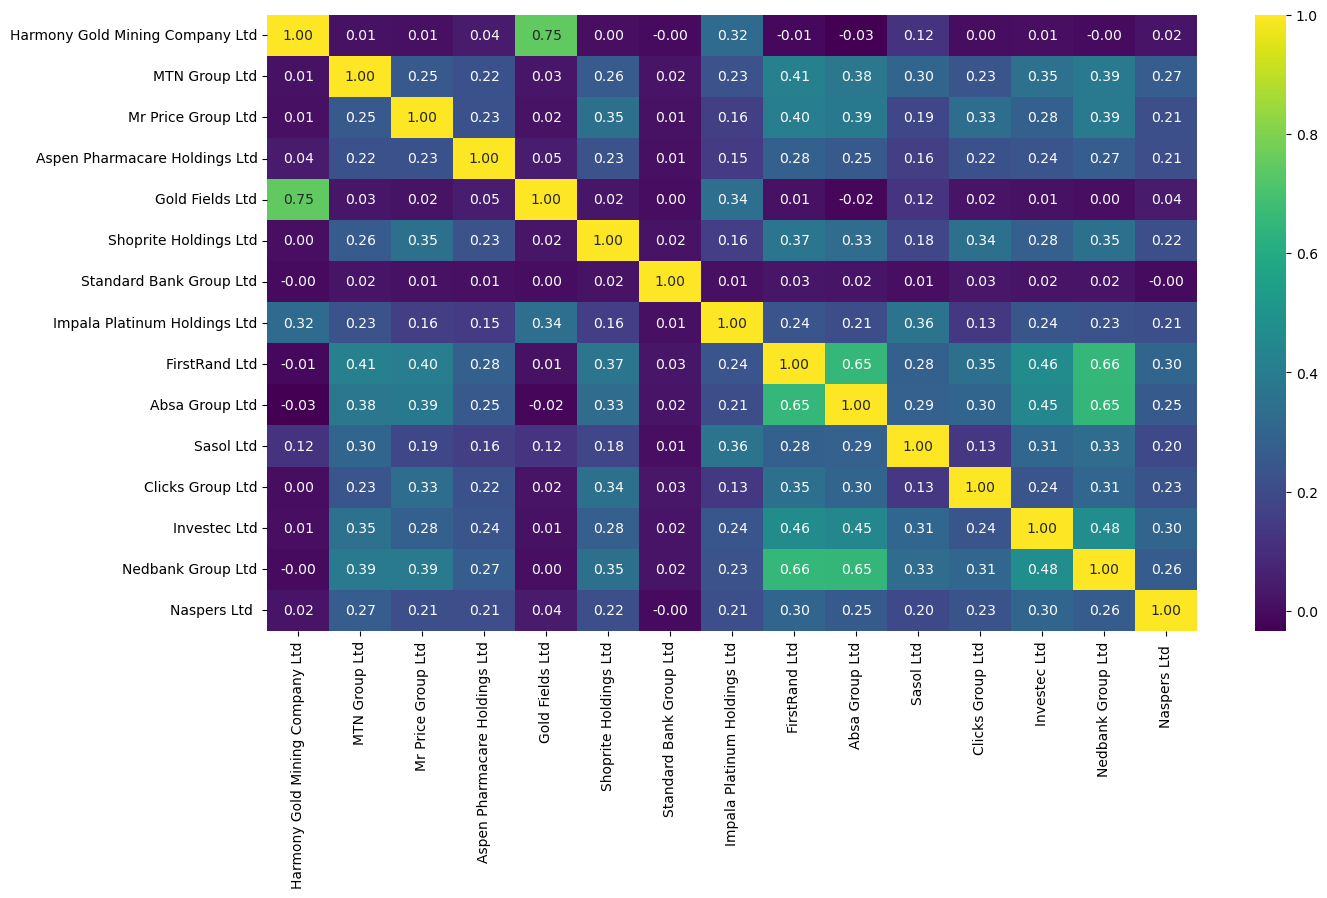

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat, annot=True, fmt=".02f", cmap='viridis');
plt.savefig('Correlation.eps', dpi=2000)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_corr_from_prices(prices: pd.DataFrame, freq: str = None, show: bool = True, save: str | None = None):
    """
    prices: index = dates, columns = tickers (numeric price data)
    freq: optional resample rule (e.g., "M", "W") before returns; None to skip
    """
    px = prices.copy()
    if freq:
        px = px.resample(freq).last()

    rets = px.pct_change().dropna(how="all")          # simple returns
    rets = rets.dropna(how="any", axis=1)             # drop any columns with NaNs remaining
    corr = rets.corr()                                 # Pearson correlation

    _plot_corr_heatmap(corr, title="Stock Return Correlations", show=show, save=save)

def _plot_corr_heatmap(corr: pd.DataFrame, title: str, show: bool, save: str | None):
    fig, ax = plt.subplots(figsize=(8, 7))
    im = ax.imshow(corr.values, interpolation="nearest")   # default colormap (no explicit colors)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Correlation", rotation=270, labelpad=12)

    # ticks & labels
    tick_labels = list(corr.columns)
    ax.set_xticks(range(len(tick_labels)))
    ax.set_yticks(range(len(tick_labels)))
    ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticklabels(tick_labels)

    ax.set_title(title)
    ax.grid(False)
    fig.tight_layout()

    if save:
        plt.savefig(save, dpi=150, bbox_inches="tight")
    if show:
        plt.show()


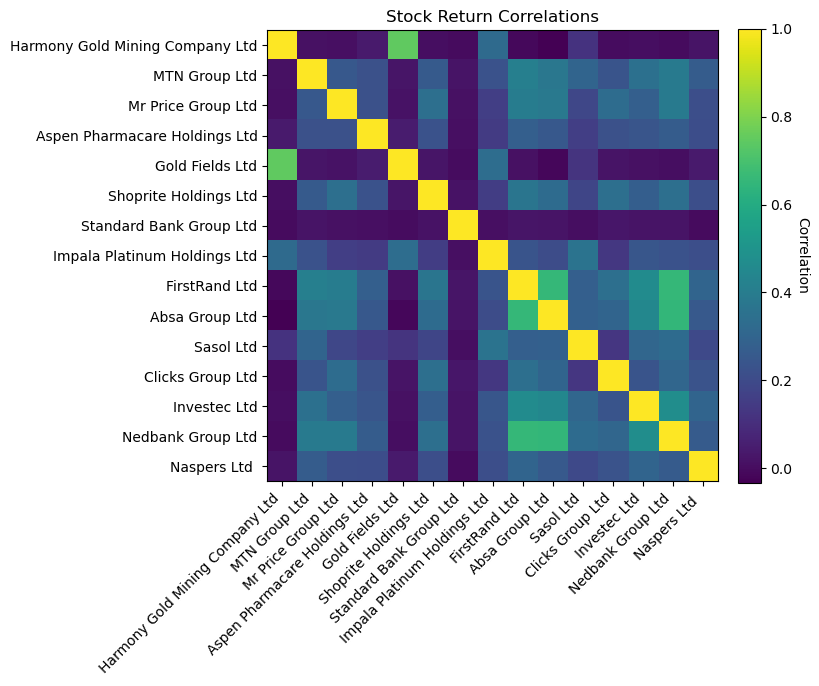

In [10]:
plot_stock_corr_from_prices(df.drop('Date',axis=1))

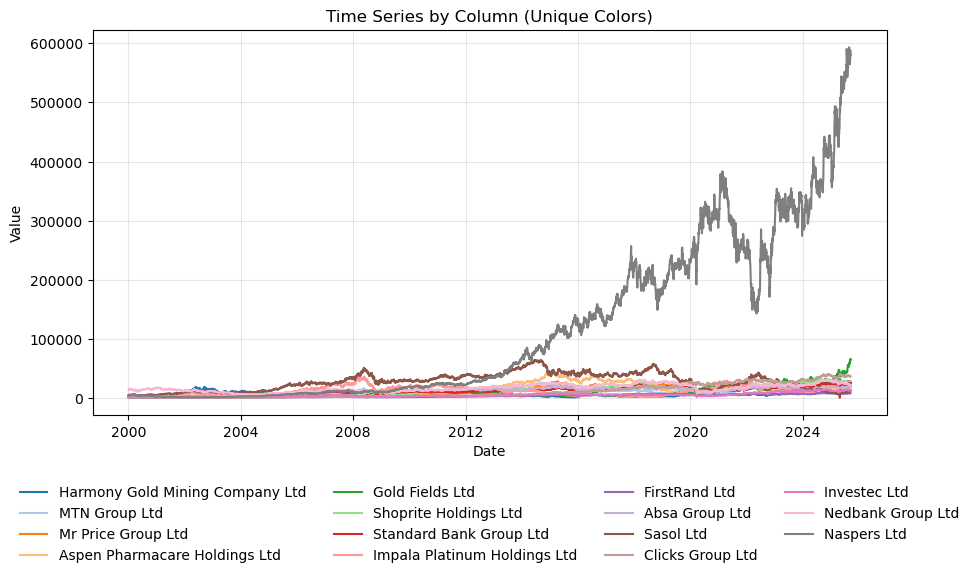

In [11]:
# We'll load the Excel file, plot each numeric column with its own unique color, and show the figure.
# The code also saves the plot to a PNG next to the notebook so you can download it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from cycler import cycler
from pathlib import Path

# ---- CONFIG ----
#excel_path = Path("/mnt/data/jse_prices_adjclose_new.xlsx")
date_column_guess = None  # Set to a column name if you know it; otherwise we'll auto-detect.

# ---- LOAD DATA ----
df_raw = pd.read_excel('jse_prices_adjclose_new.xlsx')

# Try to detect a date column if not given
if date_column_guess is None:
    # Common date-like column names to try
    candidates = ["Date", "date", "DATE", "Timestamp", "timestamp", "Time", "time"]
    found = None
    for c in candidates:
        if c in df_raw.columns:
            found = c
            break
    # Fallback: if first column looks like a date, use it
    if found is None:
        first_col = df_raw.columns[0]
        try:
            pd.to_datetime(df_raw[first_col])
            found = first_col
        except Exception:
            pass
    date_column = found
else:
    date_column = date_column_guess

# If we found a date column, set it as index
df = df_raw.copy()
if date_column is not None:
    df[date_column] = pd.to_datetime(df[date_column], errors="coerce")
    df = df.set_index(date_column).sort_index()

# Keep only numeric columns (prices)
df_num = df.select_dtypes(include=[np.number]).copy()

# ---- COLOR UTILS ----
def distinct_line_colors(n: int,
                         banks=("tab20","tab20b","tab20c","tab10","Set3")) -> list:
    """
    Collect colors from several qualitative palettes until we have >= n.
    If still short, top up with evenly spaced HSV colors.
    """
    cols = []
    for name in banks:
        cmap = cm.get_cmap(name)
        k = getattr(cmap, "N", 20)
        cols.extend([cmap(i) for i in range(k)])
        if len(cols) >= n:
            break
    if len(cols) < n:  # top up with HSV
        cols.extend([cm.hsv(i / max(1, n-1)) for i in range(n - len(cols))])
    return cols[:n]

# ---- PLOT ----
n_series = df_num.shape[1]
if n_series == 0:
    raise ValueError("No numeric columns found to plot. Please check the Excel file.")

colors = distinct_line_colors(n_series)

plt.figure(figsize=(10, 6))
for color, col in zip(colors, df_num.columns):
    plt.plot(df_num.index, df_num[col], label=str(col), linewidth=1.5, color=color)

plt.title("Time Series by Column (Unique Colors)")
plt.xlabel("Date" if date_column is not None else "Index")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)
# Place the legend outside if there are many series
ncol = min(4, n_series)  # wrap legend into multiple columns if needed
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=ncol, frameon=False)

plt.tight_layout()
#out_path = Path("/mnt/data/jse_timeseries_unique_colors.png")
#plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

# Let the user know where the file is saved
#str(out_path)


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from cycler import cycler
import numpy as np
import pandas as pd

def distinct_line_colors(n: int,
                         banks=("tab20","tab20b","tab20c","tab10","Set3")) -> list:
    """
    Collect colors from several qualitative palettes until we have >= n.
    If still short, top up with evenly spaced HSV colors.
    """
    cols = []
    for name in banks:
        cmap = cm.get_cmap(name)
        # grab all discrete colors available in the map
        k = getattr(cmap, "N", 20)
        cols.extend([cmap(i) for i in range(k)])
        if len(cols) >= n:
            break
    if len(cols) < n:  # top up with HSV
        cols.extend([cm.hsv(i / max(1, n-1)) for i in range(n - len(cols))])
    return cols[:n]

def plot_raw_prices_unique_colors(
    prices: pd.DataFrame,
    start: str | None = None,
    end: str | None = None,
    logy: bool = False,
    title: str = "Adjusted Close Prices",
    show: bool = True,
    save: str | None = None,
):
    px = prices.copy()
    if start or end:
        px = px.loc[
            slice(pd.to_datetime(start) if start else None,
                  pd.to_datetime(end) if end else None)
        ]
    px = px.select_dtypes(include="number").dropna(how="any")
    if px.empty:
        raise ValueError("No data to plot after filtering/NaN handling.")

    # set a color cycle with enough unique colors
    colors = distinct_line_colors(len(px.columns))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_prop_cycle(cycler(color=colors))  # <- unique colors per series
    px.plot(ax=ax, linewidth=1.6)

    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price(Cents)")
    if logy:
        ax.set_yscale("log")
    ax.grid(True, linestyle=":", alpha=0.5)

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    # boxed legend outside
    leg = ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=min(4, max(1, len(px.columns)//2)),
        fontsize=8,
        frameon=True,
        fancybox=True,
    )
    fr = leg.get_frame()
    fr.set_alpha(1.0); fr.set_edgecolor("black"); fr.set_linewidth(1.0); fr.set_facecolor("white")
    plt.subplots_adjust(bottom=0.25)
    plt.savefig('ClosePrices.eps', dpi=2000)
    if save:
        plt.savefig('ClosePrices.eps', dpi=2000)
    if show:
        plt.show()


In [13]:
# Suppose df has columns: "Date", "AAPL", "MSFT", "GOOGL"
#plot_prices_from_df(df, date_col="Date", price_cols=df.columns[1:], title="Tech Prices")


In [14]:
df.head()

,Harmony Gold Mining Company Ltd,MTN Group Ltd,Mr Price Group Ltd,Aspen Pharmacare Holdings Ltd,Gold Fields Ltd,Shoprite Holdings Ltd,Standard Bank Group Ltd,Impala Platinum Holdings Ltd,FirstRand Ltd,Absa Group Ltd,Sasol Ltd,Clicks Group Ltd,Investec Ltd,Nedbank Group Ltd,Naspers Ltd
Date,,,,,,,,,,,,,,,
2000-01-04,3779.943115,2306.507080,683.432800,398.885132,2468.365967,883.566528,2470.670654,3031.447754,639.448364,2753.511719,4868.091797,1242.373535,3067.920654,13431.663086,3573.536133
2000-01-05,3769.969482,2336.268066,693.337402,408.857208,2315.459961,893.494080,2480.552734,2898.595215,658.037170,2689.246582,4863.136719,1192.678467,3070.184814,12957.607422,3623.690430
2000-01-06,3590.447266,2519.797363,693.337402,398.885132,2280.509521,863.711121,2441.022461,2838.208008,644.653503,2664.529053,4937.495117,1162.861206,3043.014893,12621.817383,3573.536133
2000-01-07,3600.421387,2728.126709,693.337402,403.871185,2280.509521,853.783081,2490.435791,2838.208008,646.883972,2758.454102,4957.322266,1142.982788,3056.599365,12641.566406,3604.882324
2000-01-10,3844.770752,2916.615234,713.147156,443.759583,2398.464600,863.711121,2767.150635,2850.284424,740.570801,2916.646729,5254.764160,1222.495483,3140.373047,14419.291016,3981.044434


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


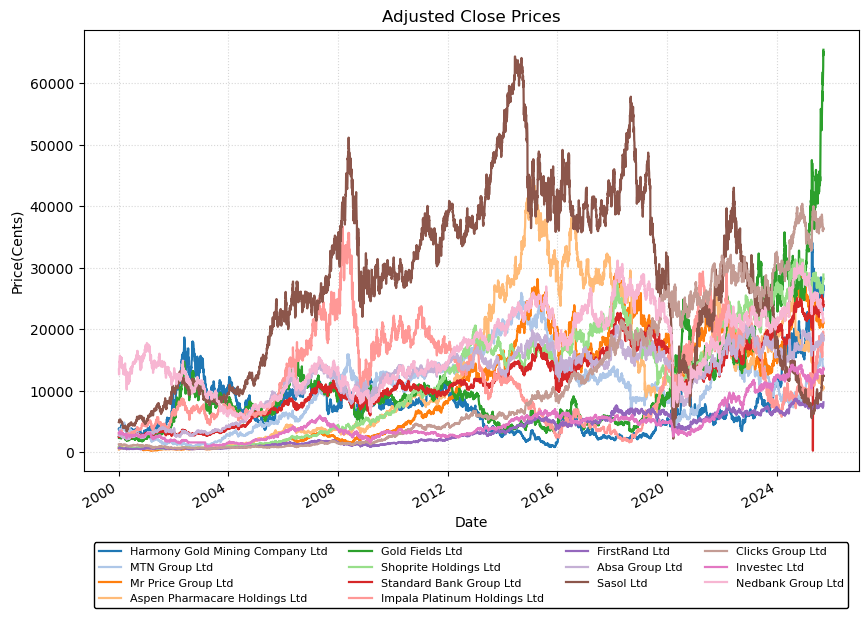

In [15]:
# Basic
plot_raw_prices_unique_colors(df.drop(['Naspers Ltd '],axis=1))

In [16]:
df.columns

Index(['Harmony Gold Mining Company Ltd', 'MTN Group Ltd',
       'Mr Price Group Ltd', 'Aspen Pharmacare Holdings Ltd',
       'Gold Fields Ltd', 'Shoprite Holdings Ltd', 'Standard Bank Group Ltd',
       'Impala Platinum Holdings Ltd', 'FirstRand Ltd', 'Absa Group Ltd',
       'Sasol Ltd', 'Clicks Group Ltd', 'Investec Ltd', 'Nedbank Group Ltd',
       'Naspers Ltd '],
      dtype='object')

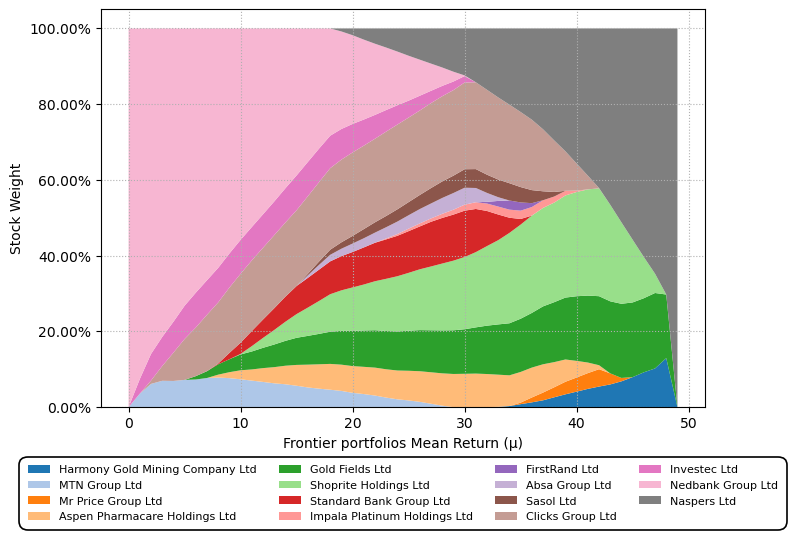

In [17]:
ef = EfficientFrontier(
    infile="jse_prices_adjclose_new.xlsx",
    sheet="jse_prices_adjclose",
    datecol="Date",
    resample="M",
    outdir="out",
    # optional: choose which palettes to pull from
    color_banks=["tab20", "tab20b", "tab20c"],
)
ef.fit()
# auto non-repeating colors:
ef.plot_composition()

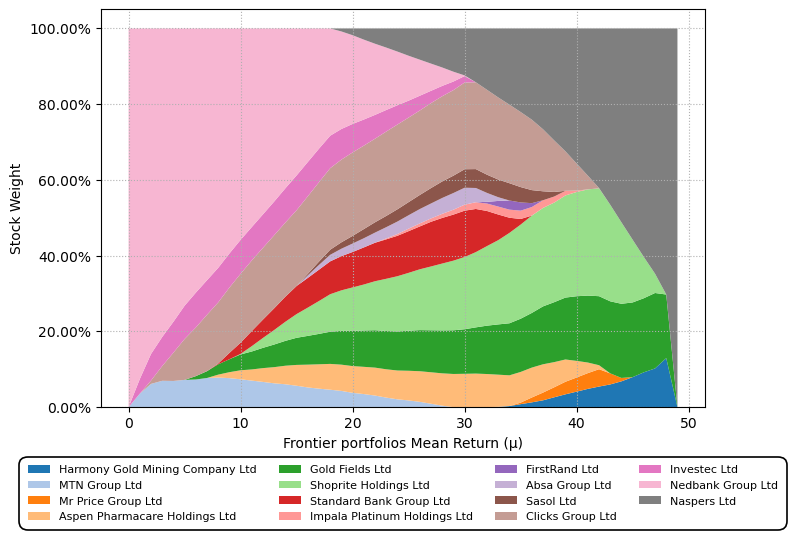

In [18]:
# or pass your own palette (exact length = number of tickers)
custom = distinct_colors(15)
ef.plot_composition(colors=custom)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


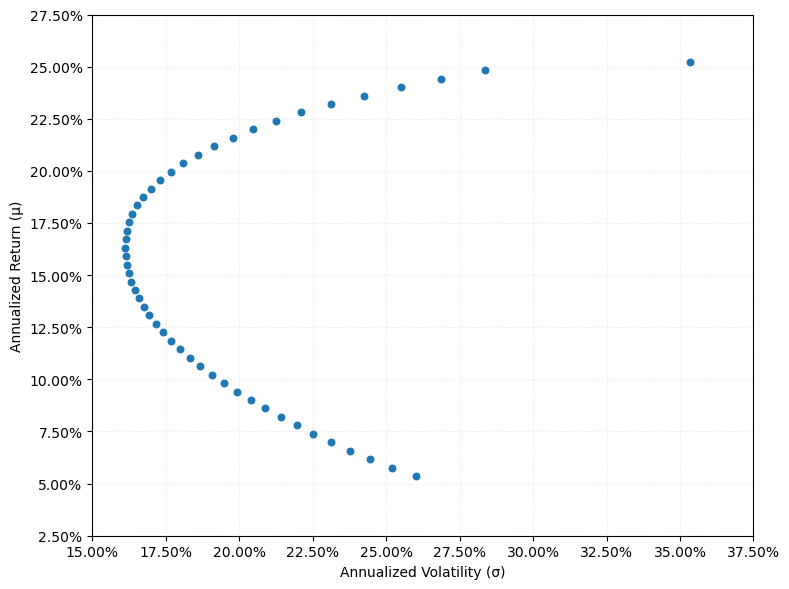

In [19]:
ef.plot_frontier()